In [ ]:
### Ques 1 

In [ ]:
# Import Statements

In [2]:

import numpy as np
import pandas as pd
import matplotlib
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline



In [ ]:
# Load dataset and split in test and training dataset.

''' we can import datasets digits directly because its in the sklearn package 
and after importing it and loading it we can directly do it '''

In [7]:
from sklearn import datasets
digits= datasets.load_digits()

digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [9]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.3, random_state=2)

In [ ]:
''' here we have split our datset into the testing and traing set of datset and 
where we will train our model '''

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# now we will train our model 

In [15]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors': [3,4,5,6,7,8,9,10]
}, cv=5, return_train_score=False)

clf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]})

In [16]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006455,0.005161,0.055850,0.037399,3,{'n_neighbors': 3},0.992063,0.984127,0.988048,0.976096,0.988048,0.985676,0.005408,2
1,0.007050,0.007152,0.042193,0.006122,4,{'n_neighbors': 4},0.992063,0.980159,0.984064,0.972112,0.988048,0.983289,0.006855,4
2,0.000000,0.000000,0.048890,0.004023,5,{'n_neighbors': 5},0.988095,0.984127,0.984064,0.988048,0.988048,0.986476,0.001944,1
3,0.010064,0.006708,0.036337,0.006475,6,{'n_neighbors': 6},0.988095,0.980159,0.980080,0.976096,0.988048,0.982495,0.004784,5
4,0.006046,0.004090,0.045598,0.000491,7,{'n_neighbors': 7},0.984127,0.980159,0.988048,0.980080,0.988048,0.984092,0.003546,3
5,0.003600,0.000490,0.046390,0.000577,8,{'n_neighbors': 8},0.984127,0.968254,0.980080,0.976096,0.984064,0.978524,0.005931,7
6,0.001600,0.001959,0.047638,0.005036,9,{'n_neighbors': 9},0.984127,0.976190,0.980080,0.980080,0.988048,0.981705,0.004045,6
7,0.003416,0.006833,0.046644,0.000463,10,{'n_neighbors': 10},0.984127,0.976190,0.980080,0.968127,0.984064,0.978518,0.005967,8


In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
knn.score(X_test, y_test)

0.9740740740740741

In [ ]:
# we are printing confusion matrix 

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[54,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 58,  0,  1,  0,  1,  1,  1],
       [ 0,  0,  0,  0, 51,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 58,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 55,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 44,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  1, 41]], dtype=int64)

In [ ]:
# now if you want to see it more beautiful we can print heatmap for better visualisation 

Text(83.22222222222221, 0.5, 'Truth')

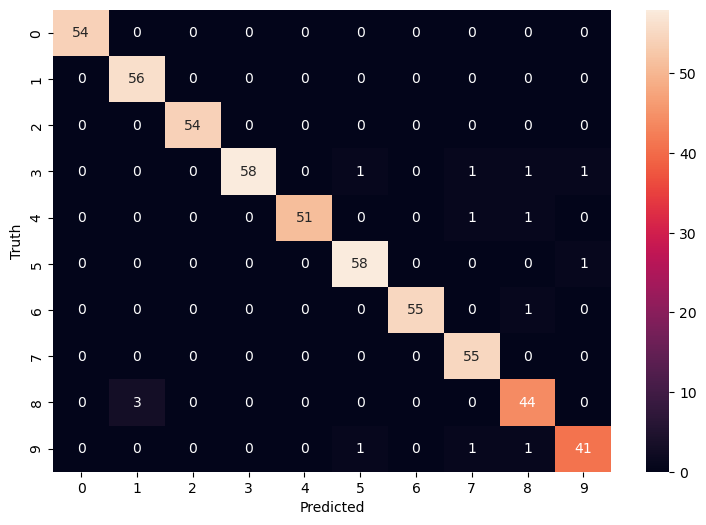

In [20]:
# Now creating the heatmap of the above matrix
import seaborn as sn
from matplotlib import pyplot as plt

plt.figure(figsize=(9,6))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
# here we predict accuracy 

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.95      1.00      0.97        56
           2       1.00      1.00      1.00        54
           3       1.00      0.94      0.97        62
           4       1.00      0.96      0.98        53
           5       0.97      0.98      0.97        59
           6       1.00      0.98      0.99        56
           7       0.95      1.00      0.97        55
           8       0.92      0.94      0.93        47
           9       0.95      0.93      0.94        44

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

